<a href="https://colab.research.google.com/github/afeld/nyu-python-public-policy/blob/master/lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Class 5: Dates and time series analysis

# LECTURE

## Importing necessary packages

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

In [ ]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

## Data preparation

### Load 311 data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [ ]:
# check data types and see that dates are stores as strings (objects)

df.dtypes

Unnamed: 0                          int64
Unnamed: 0.1                        int64
unique_key                          int64
created_date                       object
closed_date                        object
agency                             object
agency_name                        object
complaint_type                     object
descriptor                         object
location_type                      object
incident_zip                       object
incident_address                   object
street_name                        object
cross_street_1                     object
cross_street_2                     object
intersection_street_1              object
intersection_street_2              object
address_type                       object
city                               object
landmark                           object
facility_type                      object
status                             object
due_date                           object
resolution_description            

### Convert columns to datetime timestamps using pandas' to_datetime

In [ ]:
# if you don't provide the format string, it will take much longer to convert
# %I indicates that it's using a 12hr clock with AM and PM

df.created_date = pd.to_datetime(df.created_date, format='%m/%d/%Y %I:%M:%S %p')
df.closed_date = pd.to_datetime(df.closed_date, format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,2018-08-01 00:00:10,2018-08-01 01:52:46,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,2018-08-01 00:00:26,2018-08-18 10:46:43,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [ ]:
# check data types and confirm they are now datetime

df.dtypes

Unnamed: 0                                 int64
Unnamed: 0.1                               int64
unique_key                                 int64
created_date                      datetime64[ns]
closed_date                       datetime64[ns]
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                             object
incident_zip                              object
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
address_type                              object
city                                      object
landmark                                  object
facility_type       

In [ ]:
print(min(df.created_date))
print(max(df.created_date))

2018-08-01 00:00:10
2019-08-24 02:00:56


## Compute the day of week and month for each 311 request

In [ ]:
# Add columns with date, month, weekday name, and hour using .dt.

df['year'] = df.created_date.dt.year
df['date'] = df.created_date.dt.date
df['month'] = df.created_date.dt.month
df['weekday_name'] = df.created_date.dt.weekday_name
df['weekday'] = df.created_date.dt.weekday
df['hour'] = df.created_date.dt.hour

df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
0,0,0,39888071,2018-08-01 00:00:10,2018-08-01 01:52:46,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0,2018,2018-08-01,8,Wednesday,2,0
1,1,1,39889166,2018-08-01 00:00:26,2018-08-18 10:46:43,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0,2018,2018-08-01,8,Wednesday,2,0
2,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0


## Does the frequency of noise complaints vary by day of the week?

### Find the count of noise complaints per day

In [ ]:
# get count of noise complaints per individual date

noise_per_day = df[['date', 'weekday', 'weekday_name']][df.complaint_type == 'Noise - Residential'].groupby(['date', 'weekday', 'weekday_name']).size().reset_index(name='count_requests')

noise_per_day.head()

,date,weekday,weekday_name,count_requests
0,2018-08-01,2,Wednesday,331
1,2018-08-02,3,Thursday,267
2,2018-08-03,4,Friday,395
3,2018-08-04,5,Saturday,943
4,2018-08-05,6,Sunday,1044


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count of 311 Requests')

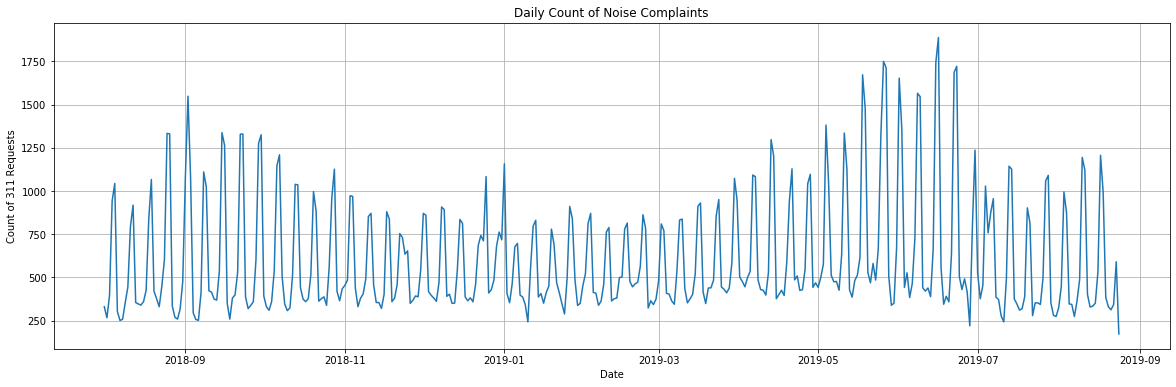

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(noise_per_day.date, noise_per_day.count_requests)
plt.grid()
plt.title('Daily Count of Noise Complaints')
plt.xlabel('Date')
plt.ylabel('Count of 311 Requests')

### Find the median count of 311 requests per weekday

In [ ]:
# get median count of complaints per day of week

noise_weekday = noise_per_day.groupby(['weekday', 'weekday_name'])['count_requests'].median().reset_index(name='median_requests')

noise_weekday

,weekday,weekday_name,median_requests
0,0,Monday,419.0
1,1,Tuesday,377.0
2,2,Wednesday,375.5
3,3,Thursday,372.0
4,4,Friday,525.5
5,5,Saturday,951.5
6,6,Sunday,993.0


Text(0, 0.5, 'Median Count of 311 Requests')

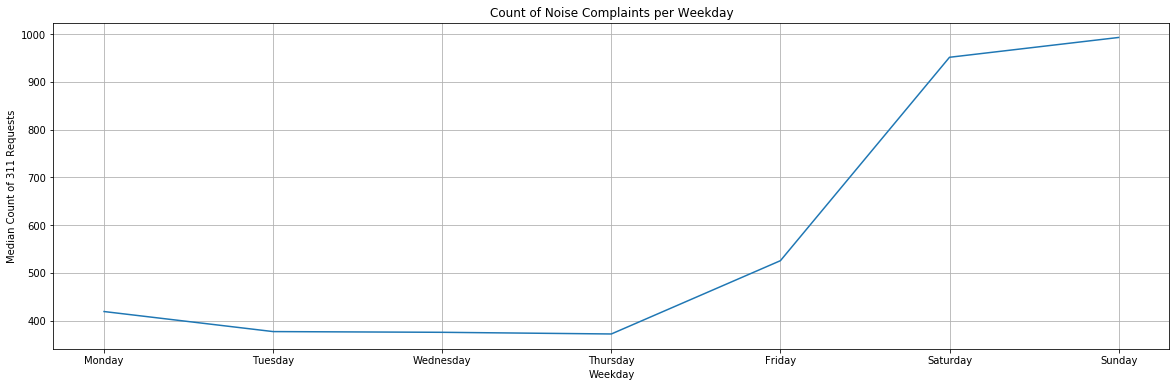

In [ ]:
# create simple line plot to visualize the trend

plt.figure(figsize=(20, 6))
plt.plot(noise_weekday.weekday_name, noise_weekday.median_requests)
plt.grid()
plt.title('Count of Noise Complaints per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Median Count of 311 Requests')

## What about by time of day?

In [ ]:
# get count of noise complaints per individual date and hour

noise_per_date_hour = df[['date', 'hour']][df.complaint_type == 'Noise - Residential'].groupby(['date', 'hour']).size().reset_index(name='count_requests')

noise_per_date_hour.head()

,date,hour,count_requests
0,2018-08-01,0,29
1,2018-08-01,1,23
2,2018-08-01,2,15
3,2018-08-01,3,5
4,2018-08-01,4,5


In [ ]:
# get median count of complaints per hour

noise_hour = noise_per_date_hour.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

noise_hour

,hour,median_requests
0,0,41
1,1,24
2,2,15
3,3,10
4,4,8
5,5,7
6,6,6
7,7,7
8,8,8
9,9,9


Text(0, 0.5, 'Median Count of 311 Requests')

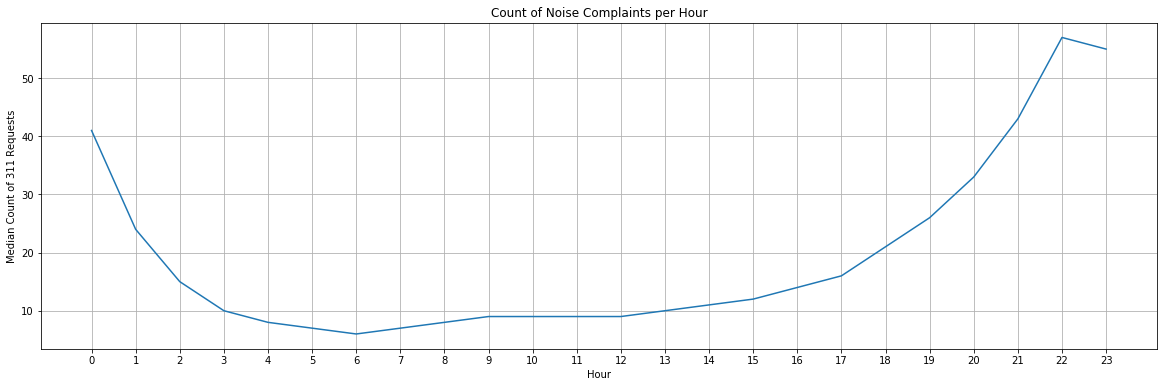

In [ ]:
# create simple line plot to visualize the trend

plt.figure(figsize=(20, 6))
plt.plot(noise_hour.hour, noise_hour.median_requests)
plt.xticks(noise_hour.hour)
plt.grid()
plt.title('Count of Noise Complaints per Hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')

## Which 311 complaints take the longest to resolve?

In [ ]:
# calculate the amount of time that passed between created_date and closed_date

df['resolution_duration_human'] = (df.closed_date - df.created_date)
df['resolution_duration_sec'] = (df.closed_date - df.created_date).astype('timedelta64[s]')

# print head to check results

df[['closed_date', 'created_date', 'resolution_duration_human', 'resolution_duration_sec']].head()

,closed_date,created_date,resolution_duration_human,resolution_duration_sec
0,2018-08-01 01:52:46,2018-08-01 00:00:10,0 days 01:52:36,6756.0
1,2018-08-18 10:46:43,2018-08-01 00:00:26,17 days 10:46:17,1507577.0
2,2018-08-01 00:49:55,2018-08-01 00:00:54,0 days 00:49:01,2941.0
3,2018-08-02 22:30:00,2018-08-01 00:01:00,1 days 22:29:00,167340.0
4,2018-08-05 00:00:00,2018-08-01 00:01:00,3 days 23:59:00,345540.0


In [ ]:
print(df.resolution_duration_human.median())
print(df.resolution_duration_sec.median())

1 days 05:22:00
105720.0


In [ ]:
# days 

longest = df.groupby('complaint_type').resolution_duration_sec.median().nlargest(15).reset_index(name='median_duration')
longest.median_duration = longest.median_duration/(60*60*24)
longest

,complaint_type,median_duration
0,FHV Licensee Complaint,117.886742
1,Taxi Complaint,99.676759
2,Radioactive Material,98.017755
3,For Hire Vehicle Complaint,96.668796
4,Graffiti,88.404670
5,New Tree Request,83.987818
6,Taxi Licensee Complaint,67.398773
7,Food Establishment,60.647442
8,Facades,53.296551
9,Sustainability Enforcement,48.410220


In [ ]:
# seconds

df.groupby('complaint_type').resolution_duration_sec.median().nsmallest(15).reset_index(name='median_duration')

,complaint_type,median_duration
0,BEST/Site Safety,0.0
1,Construction Safety Enforcement,0.0
2,Derelict Vehicles,0.0
3,Quality of Life,0.0
4,Street Light Condition,0.0
5,Taxi Report,36.0
6,Benefit Card Replacement,38.0
7,For Hire Vehicle Report,38.0
8,Advocate-Commercial Exemptions,394.0
9,Advocate-Property Value,434.5


# HOMEWORK 5 Coding: Trends in when different types of 311 occur over time

**Problem Statement**: Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.

**Step 1**. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called `top_10`.

**Step 2**. Filter the 311 dataset to only 311 requests that have complaint types in `top_10`. Save this subset of data as a dataframe called `filtered_311`.


**Step 3**. Convert the `created_date` column in `filtered_311` to be a datetime series.

**Step 4**. Create 6 new columns in `filtered_311` that extract each of the following from `created_date`
* year
* date
* month
* weekday
* weekday_name
* hour

**Step 5. Trends by hour**

Find the count of 311 requests per hour and date for each complaint type: 

* Find the count of 311 requests per hour and date for each complaint type:   
 * Hint: Use the pandas groupby function to aggregate the `filtered_311` dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.

* Find the median count of 311 requests per hour for each complaint type:
 * Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.

* Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. The final chart should look similar to this:

![Count of complaints per hour](https://raw.githubusercontent.com/afeld/nyu-python-public-policy/master/picsfornotebooks/311%20complaints%20per%20hour.png)


**Step 6. Trends by day of week**

Reproduce the steps in 5, but this time aggregate by **weekday**, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

**Step 7. Trends by month**

Reproduce the steps in 5, but this time aggregate by **month, year** (not date), and complaint_type. Produce a similar plot where x values will be month and y values will be the median count of requests per complaint type

**Step 8**. Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

# HOMEWORK 5 Tutorial: None!